In [57]:
# !unzip archive.zip

import numpy as np 
import pandas as pd 
import nltk
import string as s
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os



In [58]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:


train_data=pd.read_csv("data/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("data/test.csv",header=0,names=['classid','title','desc'])

train_data.head()

test_data.head()

train_data.shape

test_data.shape



(7600, 3)

In [60]:
# sns.countplot(train_data.classid)

<Axes: ylabel='count'>

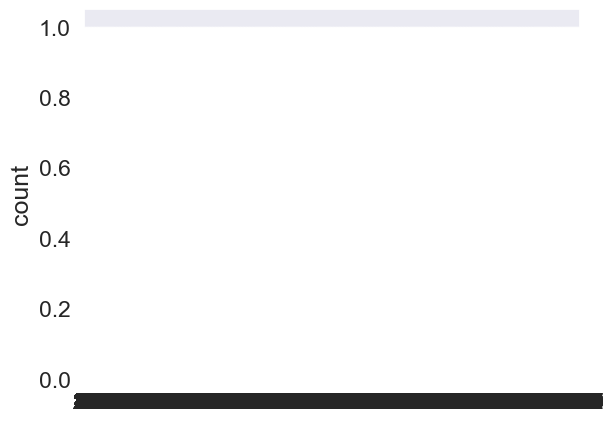

In [61]:


sns.countplot(test_data.classid)

In [62]:


train_x=train_data.desc
test_x=test_data.desc
train_y=train_data.classid
test_y=test_data.classid



In [63]:

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

train_x=train_x.apply(remove_html)
test_x=test_x.apply(remove_html)



In [64]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)





In [65]:
train_x=train_x.apply(remove_urls)
test_x=test_x.apply(remove_urls)

In [66]:

def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens



<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_13900\1328384768.py:2: SyntaxWarning: invalid escape sequence '\w'
  tokens = re.findall("[\w']+", txt)


In [67]:
train_x=train_x.apply(word_tokenize)
test_x=test_x.apply(word_tokenize)

In [68]:

def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i.lower() not in stop:
            new_lst.append(i)
    return new_lst


In [69]:

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords) 


In [70]:

def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst


In [71]:
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)



In [72]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)

    return new_lst


In [73]:
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

import nltk

In [74]:

def stemming(text):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(each) for each in text]
    return (roots)

In [75]:


train_x=train_x.apply(stemming)
test_x=test_x.apply(stemming)

In [76]:

lemmatizer=nltk.stem.WordNetLemmatizer()


In [77]:

def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst


In [78]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [80]:

def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst



In [81]:
train_x=train_x.apply(remove_extrawords)
test_x=test_x.apply(remove_extrawords) 

In [82]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [83]:
import sklearn
print(sklearn.__version__)

1.6.1


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with specific parameters
tfidf = TfidfVectorizer(min_df=8, ngram_range=(1, 3))

# Fit and transform the train data
train_1 = tfidf.fit_transform(train_x)

# Transform the test data using the trained vectorizer
test_1 = tfidf.transform(test_x)




In [85]:
# Print the number of features extracted
print("No. of features extracted")
print(len(tfidf.get_feature_names_out()))  # Use get_feature_names_out() in version 1.6.1

# Print the first 100 feature names
print(tfidf.get_feature_names_out()[:10])

No. of features extracted
59364
['aa' 'aa billion' 'aa footbal' 'aaa' 'aapl' 'aaron' 'aaron peirsol'
 'aaron rodger' 'ab' 'ababa']


In [86]:
print(train_1.shape)
print(test_1.shape)

(120000, 59364)
(7600, 59364)


In [87]:
# You can pass these directly to many scikit-learn models, like:
from sklearn.linear_model import LogisticRegression



In [88]:
model = LogisticRegression()
model.fit(train_1, train_y)


LogisticRegression()

In [89]:

# Test on the sparse test set
predictions = model.predict(test_1)

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import time  # Import time module

In [92]:


# Use sparse matrix instead of converting to dense array
pd.DataFrame(train_1[:100].toarray(), columns=tfidf.get_feature_names_out())



,aa,aa billion,aa footbal,aaa,aapl,aaron,aaron peirsol,aaron rodger,ab,ababa,...,zone govern,zoo,zook,zook fire,zoom,zurich,zurich challeng,zurich reuter,zurich switzerland,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Start timing
start_time = time.time()

# Training the Naive Bayes model
NB_MN = MultinomialNB(alpha=0.52)
NB_MN.fit(train_1, train_y)  # Use train_1 directly as a sparse matrix
pred = NB_MN.predict(test_1)  # Use test_1 directly as a sparse matrix

In [94]:


# First 20 actual and predicted labels
print("First 20 actual labels")
print(test_y.tolist()[:20])
print("First 20 predicted labels")
print(pred.tolist()[:20])

First 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
First 20 predicted labels
[3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [95]:


# F1 score and Accuracy evaluation
print("F1 score of the model")
print(f1_score(test_y, pred, average='micro'))
print("Accuracy of the model")
print(accuracy_score(test_y, pred))
print("Accuracy of the model in percentage")
print(f"{round(accuracy_score(test_y, pred) * 100, 3)} %")



F1 score of the model
0.8955263157894737
Accuracy of the model
0.8955263157894737
Accuracy of the model in percentage
89.553 %


In [96]:

# Confusion Matrix and Visualization
sns.set(font_scale=1.5)
cof = confusion_matrix(test_y, pred)

In [97]:


# Convert confusion matrix into a DataFrame for better readability
cof = pd.DataFrame(cof, index=[i for i in range(1, 5)], columns=[i for i in range(1, 5)])



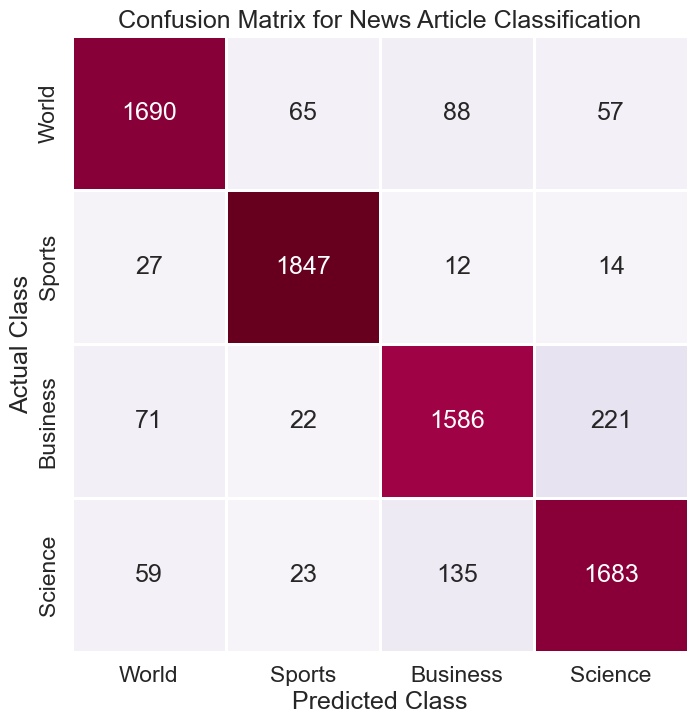

In [98]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cof, cmap="PuRd", linewidths=1, annot=True, square=True, cbar=False, fmt='d',
            xticklabels=['World', 'Sports', 'Business', 'Science'],
            yticklabels=['World', 'Sports', 'Business', 'Science'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for News Article Classification")
plt.show()

In [99]:


# End timing
end_time = time.time()
print(f"Training and evaluation took {end_time - start_time} seconds")

Training and evaluation took 3.241539716720581 seconds


In [100]:
import joblib

# Save the trained Naive Bayes model to a file
joblib.dump(NB_MN, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']

In [104]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']